Scoring the models and visualising the scores

In [1]:
from pathlib import Path
import os
_cwd = os.getcwd()
os.chdir(Path(_cwd)/'..') # .\SAE\
os.getcwd()
fig_path = Path("./figures/")
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

import numpy as np
import torch
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

%matplotlib inline

# ------- internal imports
from models import GenerativeAE
import models, metrics, experiments, datasets
from metrics import score_disentanglement 
from experiments import EvaluationManager
from experiments.EvaluationManager import ModelHandler, VisualModelHandler, VectorModelHandler
from datasets import synth_dataset 
import visualisations
from visualisations import visualise_data, visualise_model

# Scoring 

## Visual datasets

In [ ]:
model_names = ["SAE","ESAE","VAE", "RSAE"]
scores_df = pd.DataFrame()
scores_df["model_name"] = model_names
all_scores = []

In [ ]:
#TODO: load handlers and scores 

## Vector datasets

In [2]:
#load all scores and save them in lists 
#extract relevan numbers from the lists and form a df
# plot df with seaborn
data_versions = ["standard","discrete","continuous","big"]
model_names = ["VecESAE","VecSAE","VecVAE","VecRSAE"]
model_versions = [["standard"], ["standard", "full"], ["standard"], ["standard","full"]]

model_params=[]
for data_v in data_versions:
    for i,model_n in enumerate(model_names): 
        for model_v in model_versions[i]:
            _params = {"model_name":model_n,
                       "model_version":model_v,
                       "data":"SynthVec",
                       "data_version":data_v}
            model_params.append(_params)

In [5]:
# collect the handlers
scores=[]
for params in model_params:
        handler = (VectorModelHandler.from_config(**params, verbose=False))
        handler.config["logging_params"]["save_dir"] = "./logs"
        scores.append(handler.load_scores(name="scoring"))

Found existing config file: loading.
----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecESAE model hanlder loaded.
Found existing config file: loading.
----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecSAE model hanlder loaded.
Found existing config file: loading.
----------Opening SynthVec dataset version standard / train---------

Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version big / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecESAE model hanlder loaded.
Found existing config file: loading.
----------Opening SynthVec dataset version big / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version big / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecSAE model hanlder loaded.
Found existing config file: loading.
----------Opening SynthVec dataset version big / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version big / test----------
Files

In [11]:
# fill the dataframe
scores_df = pd.DataFrame()
scores_df["model_name"] = [params["model_name"] for params in model_params]
scores_df["model_version"] = [params["model_version"] for params in model_params]
scores_df["data_version"] = [params["data_version"] for params in model_params]
for i,score_set in enumerate(scores):
    try: 
        for k,v in score_set.items():
            scores_df.loc[i,k] = v
    except AttributeError: 
        continue

## Visualise scores

In [12]:
scores_df

,model_name,model_version,data_version,RBF,IMQ,CAT,dCOV,DCI,IRS,MIG,ModExp,SAP
0,VecESAE,standard,standard,0.018706,0.056371,-0.207744,0.000814,0.017032,0.570254,0.018102,0.873887,0.000000
1,VecSAE,standard,standard,0.026888,0.069378,-802.112671,5.240126,0.005647,0.674220,0.005635,0.430792,0.011800
2,VecSAE,full,standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VecVAE,standard,standard,0.001399,0.010498,-127.531487,0.141176,0.000990,0.350142,0.002403,0.290196,0.007000
4,VecRSAE,standard,standard,0.001992,0.014597,-0.056623,0.000115,0.010067,0.542371,0.018931,0.828920,0.001400
5,VecRSAE,full,standard,0.020184,0.052343,-0.005410,0.000014,0.005044,0.703651,0.008275,0.919278,0.000000
6,VecESAE,standard,discrete,0.021066,0.050974,-0.475891,0.001579,0.038179,0.383653,0.014774,0.765243,0.002000
7,VecSAE,standard,discrete,0.024454,0.033591,-1294.276245,4.202439,0.015070,0.625581,0.028266,0.617612,0.026800
8,VecSAE,full,discrete,0.020909,0.047831,-152.120712,0.632827,0.026565,0.373523,0.015735,0.789983,0.010400
9,VecVAE,standard,discrete,0.001554,0.010958,-131.270096,0.142695,0.001734,0.370357,0.002599,0.653227,0.007800


In [24]:
scores_df.to_csv("VecScores.csv")

In [ ]:
#TODO: adjust plotting for visual datasets

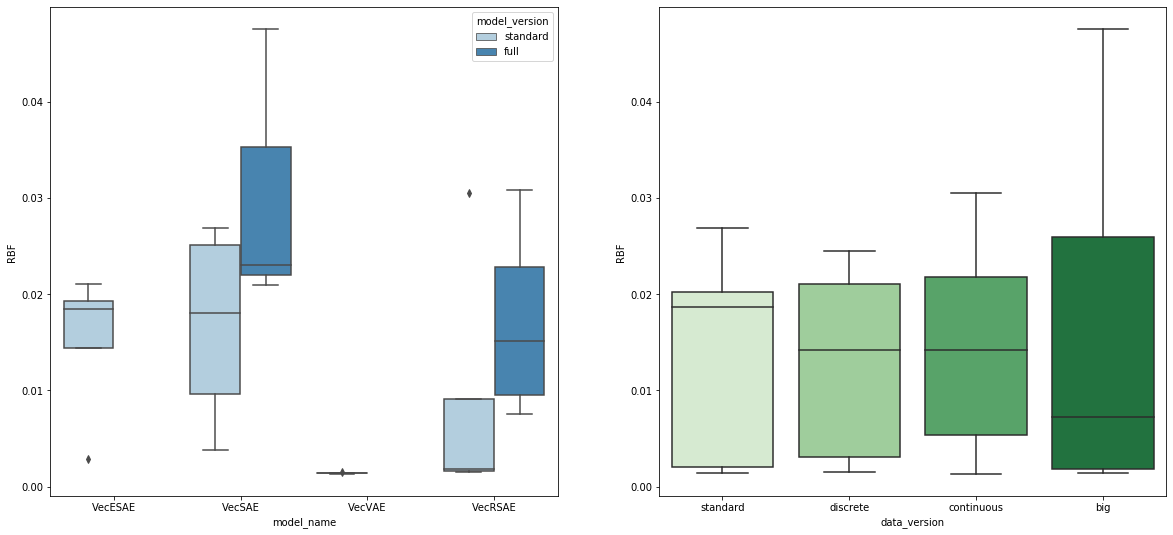

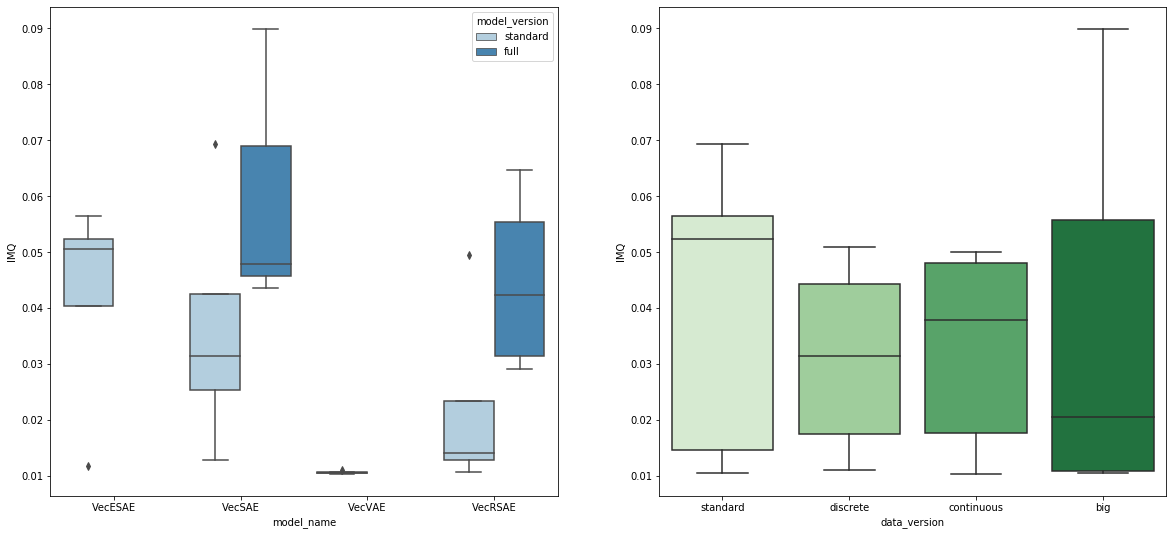

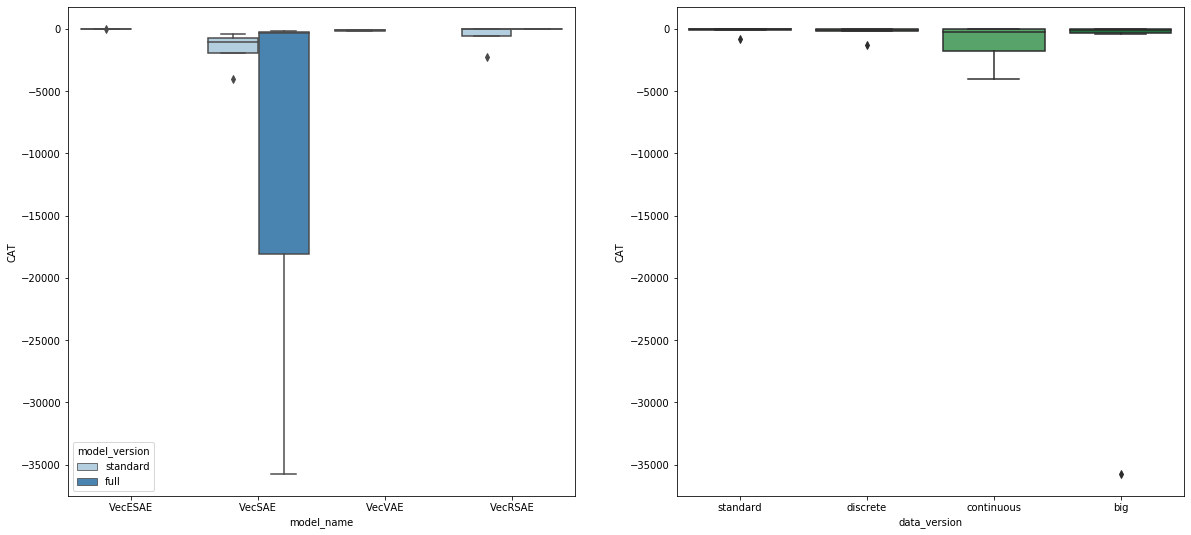

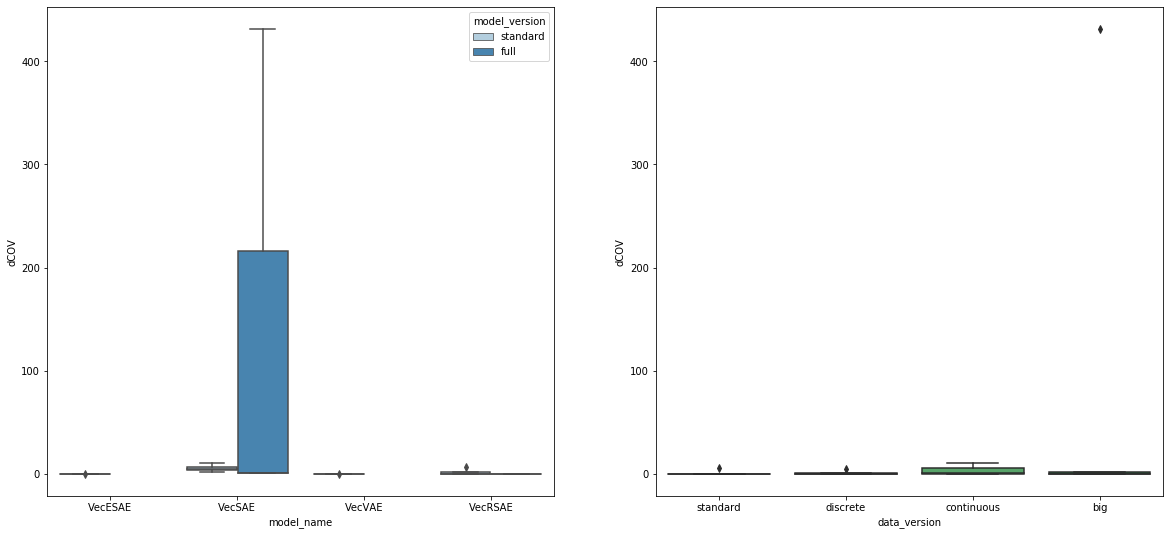

In [23]:
for k in scores_df.columns[3:7]: # orthogonality
    fig, axs = plt.subplots(ncols=2, figsize=(20,9))
    sns.boxplot(x='model_name',y=k,data=scores_df, ax=axs[0], hue="model_version",
                palette="Blues")
    sns.boxplot(x='data_version',y=k,data=scores_df, ax=axs[1], palette="Greens")
    """
    sns.catplot(x='model_name',y=k,
                data=scores_df, 
                hue="model_version",
                col="data_version",
                palette="Blues")
                
    """

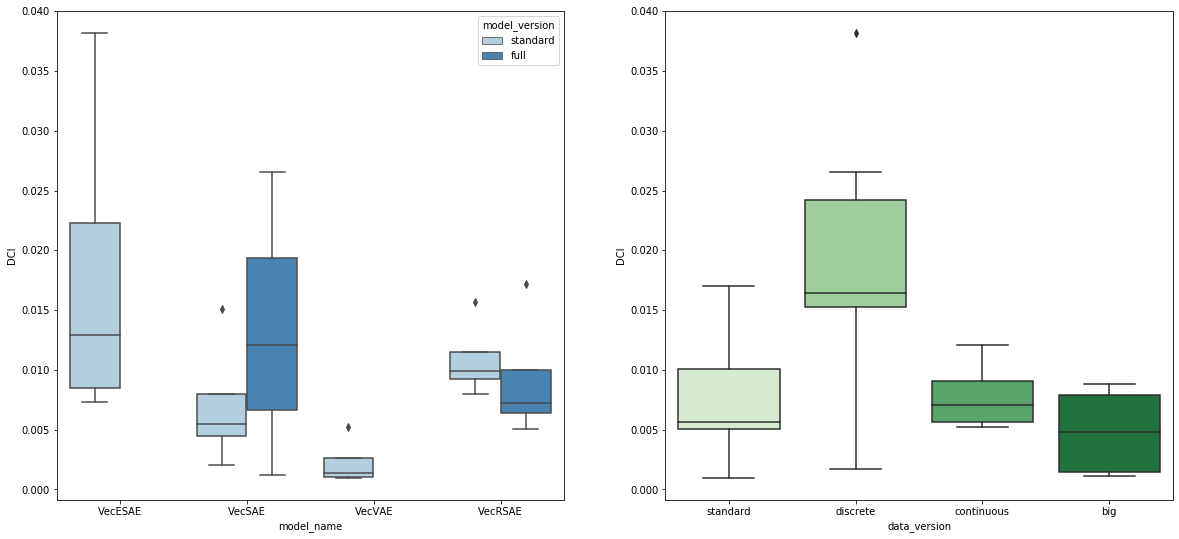

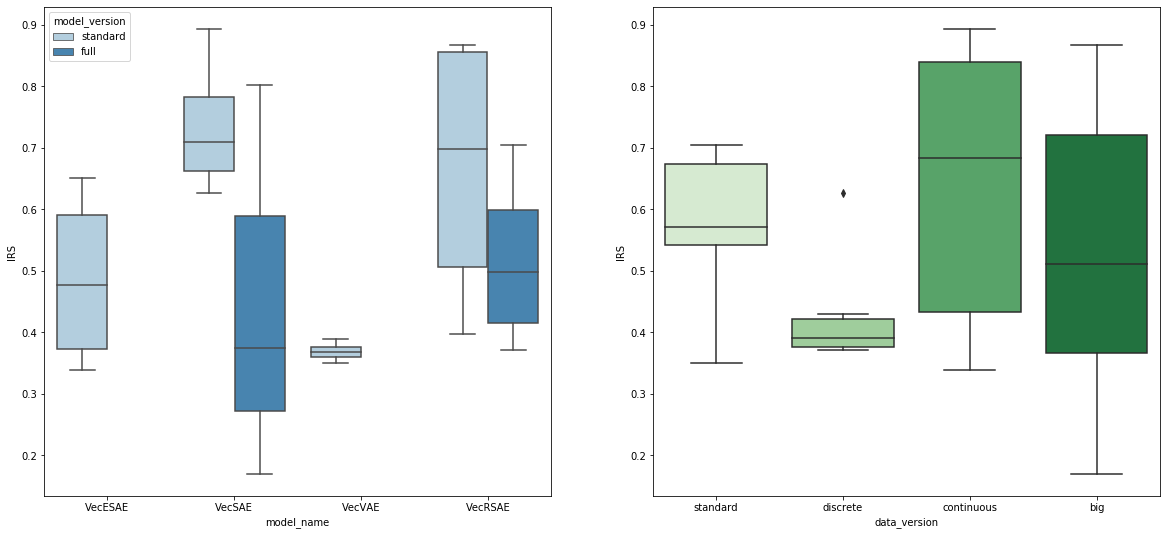

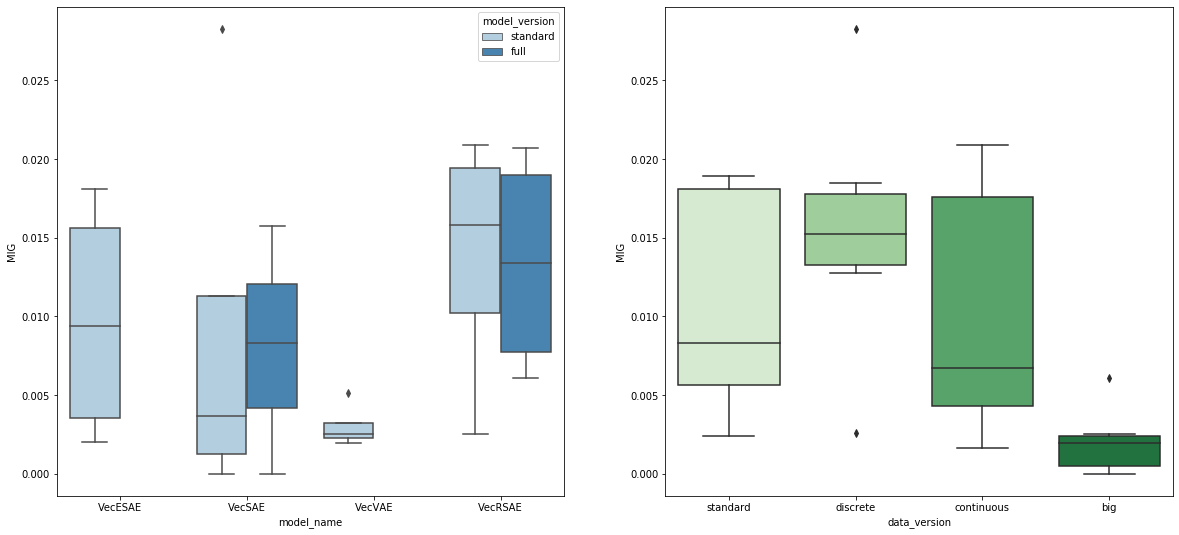

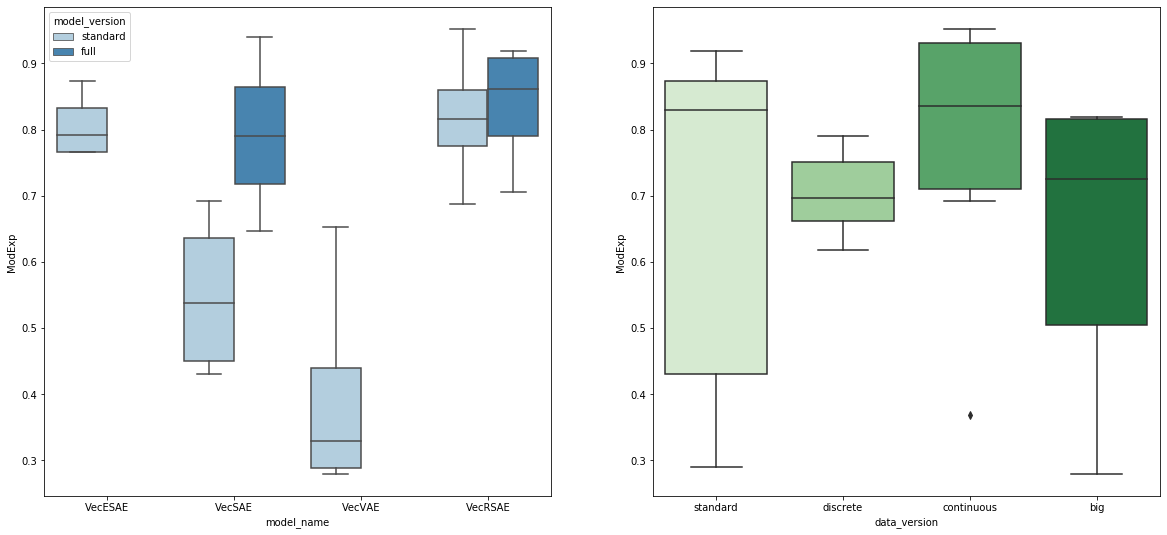

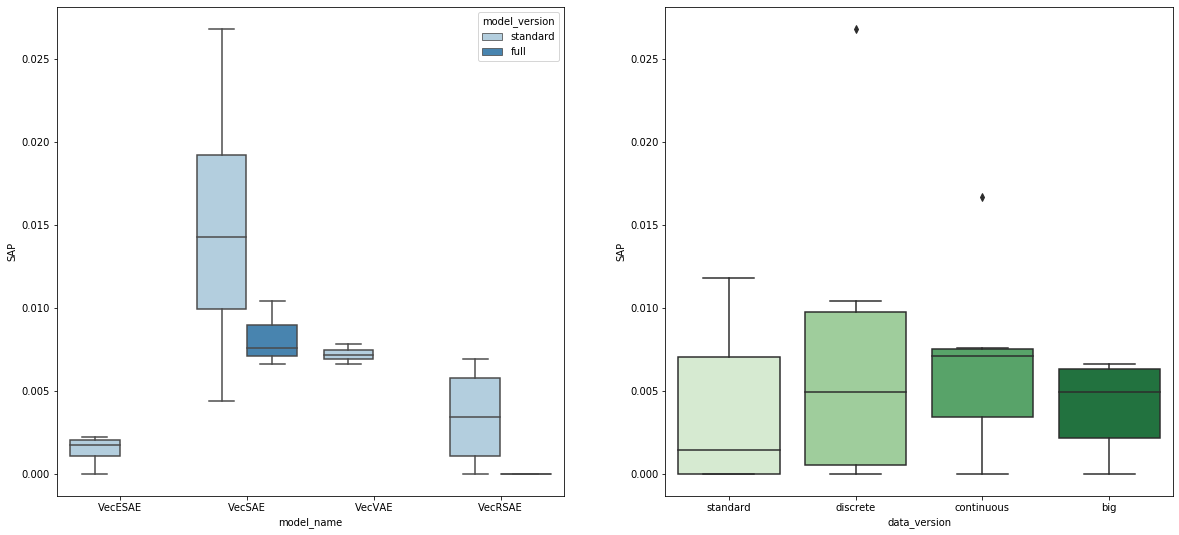

In [22]:
# finally visualising 
for k in scores_df.columns[7:]: # disentanglement
    fig, axs = plt.subplots(ncols=2, figsize=(20,9))
    sns.boxplot(x='model_name',y=k,data=scores_df, ax=axs[0], hue="model_version", palette="Blues")
    sns.boxplot(x='data_version',y=k,data=scores_df, ax=axs[1], palette="Greens")